<a href="https://colab.research.google.com/github/amalazimroshan/image-similarity/blob/main/image_similarity_using_FAISS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faiss-cpu --no-cache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 112.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
from sklearn.preprocessing import normalize

In [ ]:
def generate_sample_vectors(n_vectors=100, n_dimmensions=3, seed=42):
  np.random.seed(seed)
  vectors = np.random.randn(n_vectors, n_dimmensions)
  normalized_vectors = normalize(vectors, norm='l2')
  return normalized_vectors

vectors = generate_sample_vectors()

In [ ]:
def plot_vectors_3d(vectors, query_vector=None, matches=None, title="Vector Space Visualization"):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(vectors[:,0], vectors[:,1], vectors[:, 2], c='blue', alpha=0.5, label="database vectors")

  if query_vector is not None:
    ax.scatter(query_vector[0], query_vector[1], query_vector[2], c='green', s=100, label="matches")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()


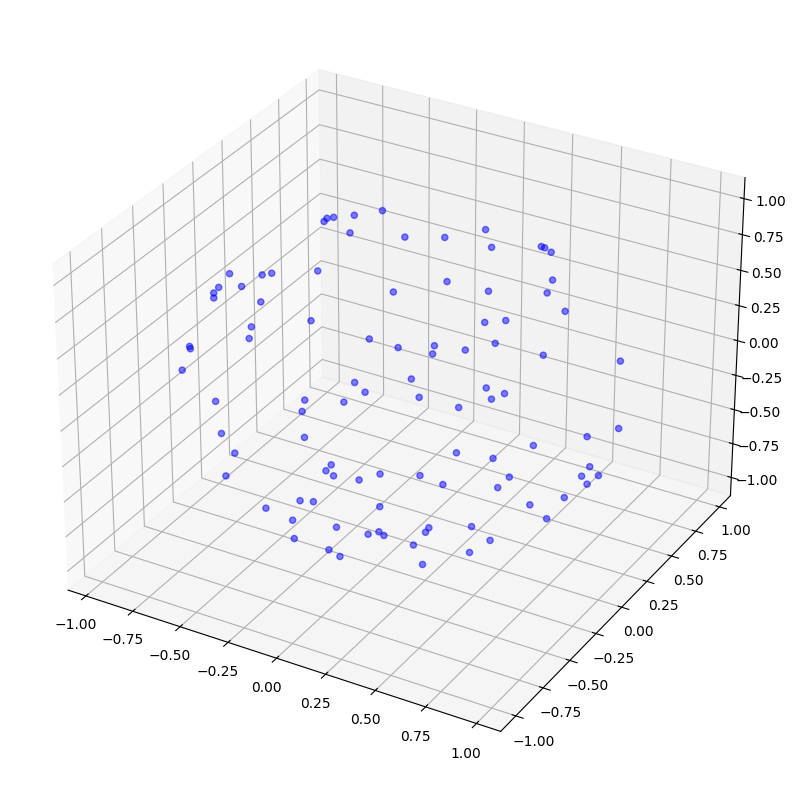

In [ ]:
plot_vectors_3d(vectors)

In [ ]:
def train_kmeans_get_centroids(vectors, n_clusters):
  kmeans = faiss.Kmeans(d=vectors.shape[1], k=n_clusters, niter=20, verbose=False)
  kmeans.train(vectors)
  return kmeans.centroids

centroids = train_kmeans_get_centroids(vectors, 4)

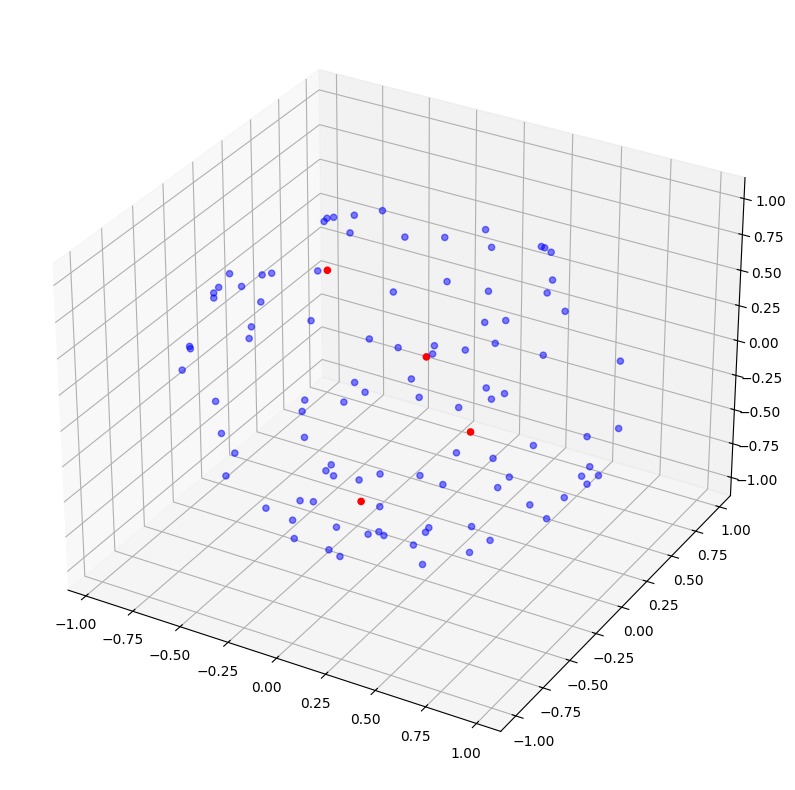

In [ ]:
def plot_vectors_with_centroids(vectors, centroids, query_vector=None, matches=None, title="Vector Space Visualization"):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(vectors[:,0], vectors[:,1], vectors[:, 2], c='blue', alpha=0.5, label="database vectors")
  ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='red', alpha=1)
  if query_vector is not None:
    ax.scatter(query_vector[0], query_vector[1], query_vector[2], c='green', s=100, label="matches")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

plot_vectors_with_centroids(vectors, centroids)

In [ ]:
def faiss_flat_l2_search(vectors, centroids):
  index = faiss.IndexFlatL2(vectors.shape[1])
  index.add(centroids)
  distances, assignments = index.search(vectors, 1)
  return distances, assignments.ravel()

In [ ]:
def cosine_search(database_vectors, query_vector, k=5):
  similarities = np.dot(database_vectors, query_vector)
  top_k_indices = np.argsort(similarities)[-k:][::-1]
  return top_k_indices